Média (%/mês): 0.47
Mediana (%/mês): 0.43
Moda (%/mês): 0.25
Desvio Padrão: 0.39


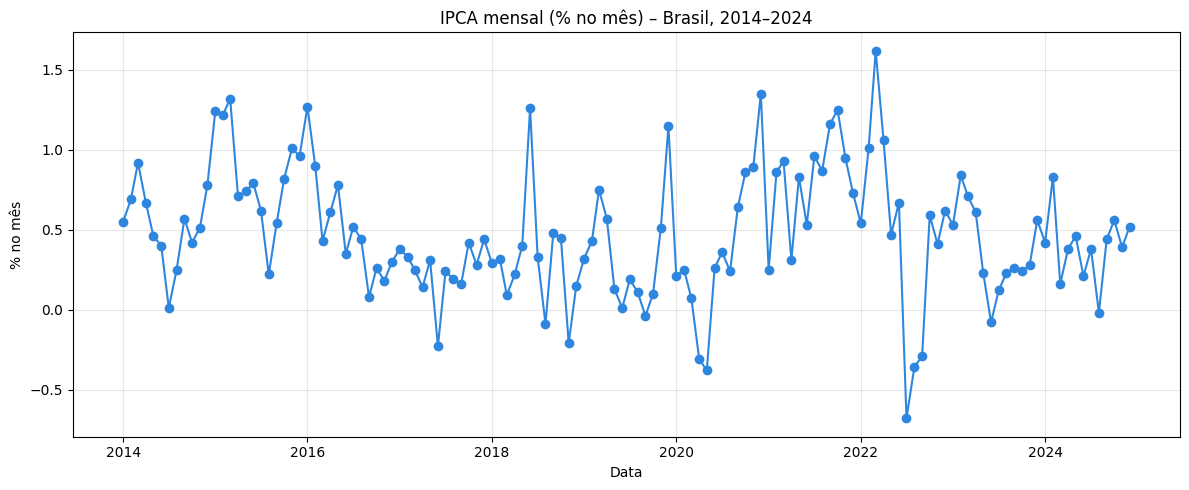

In [ ]:
import pandas as pd
import requests
import matplotlib.pyplot as plt

# 1) IPCA (código 433) – mensal, % no mês
# Período: 2014-01-01 até 2024-12-31
url = "https://api.bcb.gov.br/dados/serie/bcdata.sgs.433/dados?formato=json&dataInicial=01/01/2014&dataFinal=31/12/2024"

r = requests.get(url)
data = r.json()
df = pd.DataFrame(data)

# 2) Limpeza
df['data'] = pd.to_datetime(df['data'], dayfirst=True)   # datas em dd/mm/yyyy
df['valor'] = pd.to_numeric(df['valor'], errors='coerce')  # valores numéricos
df = df.dropna(subset=['valor']).sort_values('data').reset_index(drop=True)

# 3) Estatística básica
media = df['valor'].mean()
mediana = df['valor'].median()
moda_series = df['valor'].mode()
moda_val = moda_series.iloc[0] if not moda_series.empty else None
desvio = df['valor'].std()

print(f"Média (%/mês): {media:.2f}")
print(f"Mediana (%/mês): {mediana:.2f}")
print(f"Moda (%/mês): {moda_val:.2f}" if moda_val is not None else "Moda: —")
print(f"Desvio Padrão: {desvio:.2f}")

# 4) Gráfico
plt.figure(figsize=(12,5))
plt.plot(df['data'], df['valor'], marker='o', linewidth=1.5, color='#2E86DE')
plt.title("IPCA mensal (% no mês) – Brasil, 2014–2024")
plt.ylabel("% no mês")
plt.xlabel("Data")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [ ]:
# Estatísticas anuais
df['Ano'] = df['data'].dt.year
stats_ano = df.groupby('Ano')['valor'].agg(['mean','median','std']).round(2)
print(stats_ano)


      mean  median   std
Ano                     
2014  0.52    0.53  0.24
2015  0.85    0.80  0.32
2016  0.51    0.44  0.34
2017  0.24    0.26  0.18
2018  0.31    0.30  0.37
2019  0.35    0.26  0.35
2020  0.37    0.26  0.50
2021  0.80    0.86  0.31
2022  0.47    0.56  0.65
2023  0.38    0.27  0.27
2024  0.39    0.40  0.21


<Figure size 1200x600 with 0 Axes>

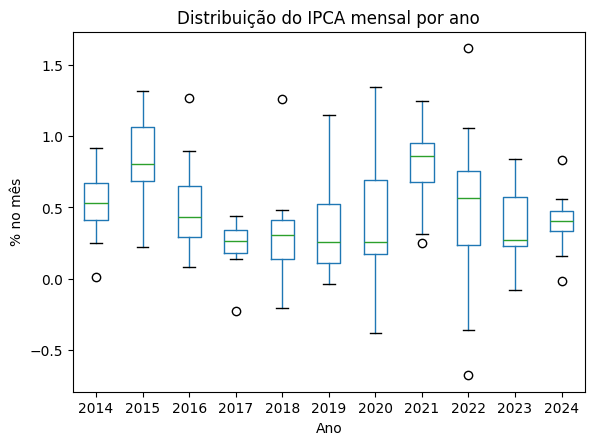

In [ ]:
plt.figure(figsize=(12,6))
df.boxplot(column='valor', by='Ano', grid=False)
plt.title("Distribuição do IPCA mensal por ano")
plt.suptitle("")  # remove título duplicado
plt.ylabel("% no mês")
plt.show()


In [ ]:
max_row = df.loc[df['valor'].idxmax()]
min_row = df.loc[df['valor'].idxmin()]

print(f"Pico de inflação: {max_row['valor']:.2f}% em {max_row['data'].strftime('%b/%Y')}")
print(f"Menor inflação: {min_row['valor']:.2f}% em {min_row['data'].strftime('%b/%Y')}")


Pico de inflação: 1.62% em Mar/2022
Menor inflação: -0.68% em Jul/2022


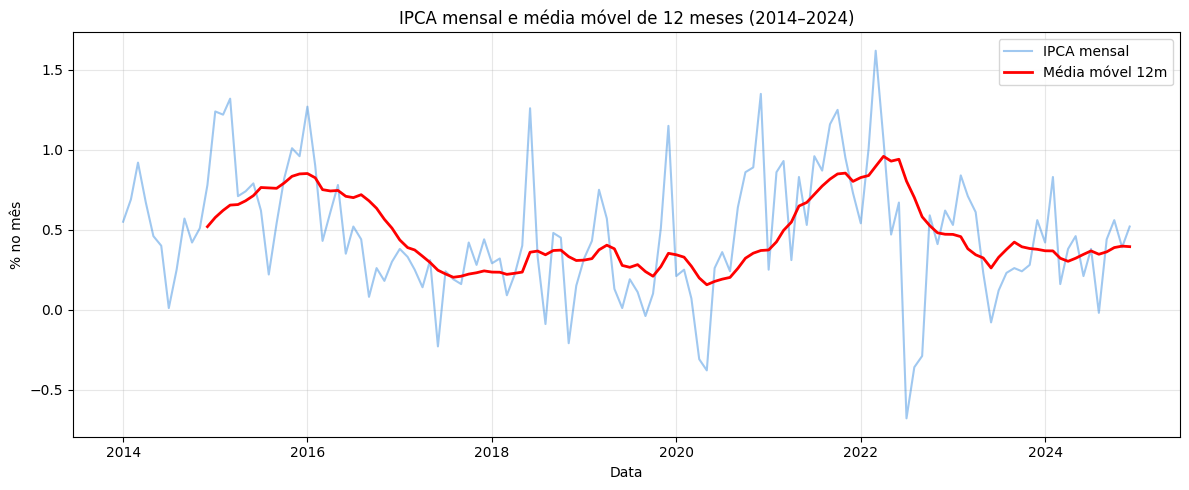

In [ ]:
# Média móvel de 12 meses
df['media_movel_12m'] = df['valor'].rolling(window=12).mean()

plt.figure(figsize=(12,5))
plt.plot(df['data'], df['valor'], alpha=0.45, label='IPCA mensal', color='#2E86DE')
plt.plot(df['data'], df['media_movel_12m'], color='red', linewidth=2, label='Média móvel 12m')
plt.title("IPCA mensal e média móvel de 12 meses (2014–2024)")
plt.ylabel("% no mês")
plt.xlabel("Data")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()


plt.show()


Pico de inflação: 1.62% em Mar/2022
Menor inflação: -0.68% em Jul/2022


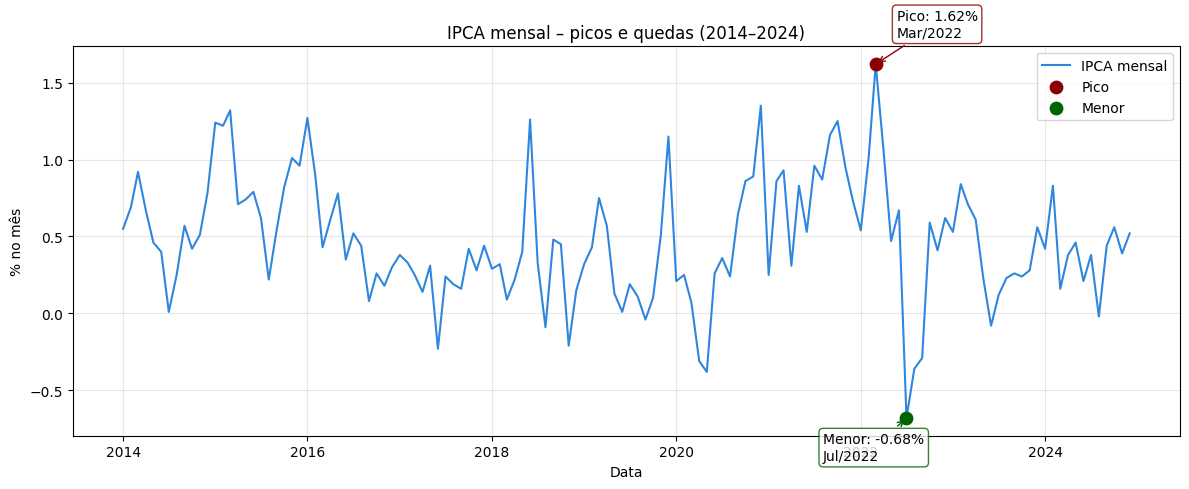

In [ ]:
# Identificação de picos e quedas
max_row = df.loc[df['valor'].idxmax()]
min_row = df.loc[df['valor'].idxmin()]

print(f"Pico de inflação: {max_row['valor']:.2f}% em {max_row['data'].strftime('%b/%Y')}")
print(f"Menor inflação: {min_row['valor']:.2f}% em {min_row['data'].strftime('%b/%Y')}")

# Gráfico com anotações dos picos e quedas
plt.figure(figsize=(12,5))
plt.plot(df['data'], df['valor'], linewidth=1.5, color='#2E86DE', label='IPCA mensal')
plt.scatter(max_row['data'], max_row['valor'], color='darkred', s=80, zorder=3, label='Pico')
plt.scatter(min_row['data'], min_row['valor'], color='darkgreen', s=80, zorder=3, label='Menor')

# Anotações
plt.annotate(
    f"Pico: {max_row['valor']:.2f}%\n{max_row['data'].strftime('%b/%Y')}",
    xy=(max_row['data'], max_row['valor']),
    xytext=(15, 20),
    textcoords='offset points',
    arrowprops=dict(arrowstyle='->', color='darkred'),
    bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='darkred', alpha=0.8)
)

plt.annotate(
    f"Menor: {min_row['valor']:.2f}%\n{min_row['data'].strftime('%b/%Y')}",
    xy=(min_row['data'], min_row['valor']),
    xytext=(-60, -30),
    textcoords='offset points',
    arrowprops=dict(arrowstyle='->', color='darkgreen'),
    bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='darkgreen', alpha=0.8)
)

plt.title("IPCA mensal – picos e quedas (2014–2024)")
plt.ylabel("% no mês")
plt.xlabel("Data")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Salvar imagem
plt.show()


Sazonalidade

     mean  median   std
Mes                    
1    0.55    0.42  0.37
2    0.70    0.83  0.32
3    0.66    0.71  0.52
4    0.45    0.57  0.36
5    0.40    0.46  0.34
6    0.38    0.35  0.43
7    0.28    0.33  0.41
8    0.19    0.22  0.31
9    0.36    0.44  0.39
10   0.54    0.45  0.33
11   0.47    0.41  0.36
12   0.69    0.62  0.36


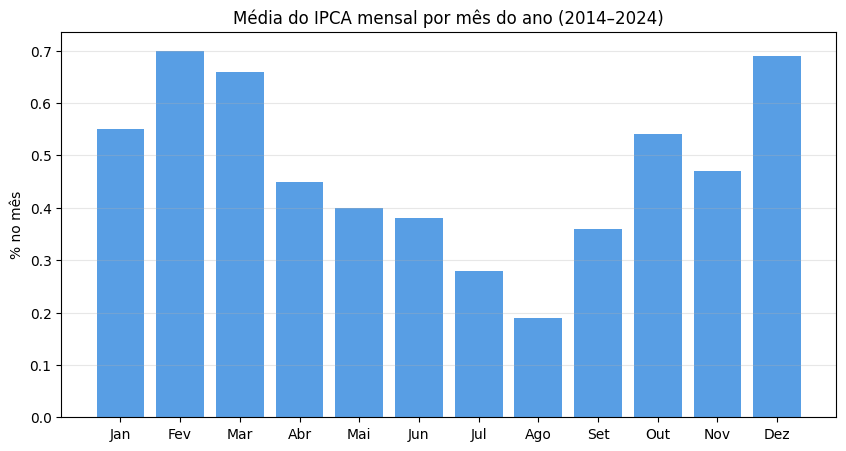

<Figure size 1200x600 with 0 Axes>

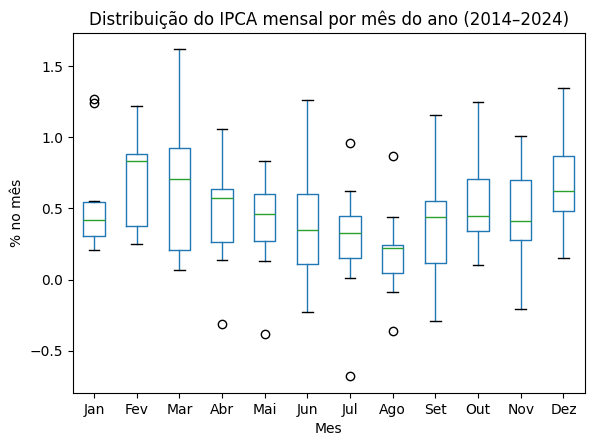

In [ ]:
# Criar coluna com mês
df['Mes'] = df['data'].dt.month

# Estatísticas por mês (média, mediana, desvio padrão)
stats_mes = df.groupby('Mes')['valor'].agg(['mean','median','std']).round(2)
print(stats_mes)

# Gráfico de barras: média do IPCA por mês
plt.figure(figsize=(10,5))
plt.bar(stats_mes.index, stats_mes['mean'], color='#2E86DE', alpha=0.8)
plt.xticks(range(1,13),
           ['Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez'])
plt.title("Média do IPCA mensal por mês do ano (2014–2024)")
plt.ylabel("% no mês")
plt.grid(axis='y', alpha=0.3)
plt.show()

# Boxplot por mês: distribuição completa
plt.figure(figsize=(12,6))
df.boxplot(column='valor', by='Mes', grid=False)
plt.xticks(range(1,13),
           ['Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez'])
plt.title("Distribuição do IPCA mensal por mês do ano (2014–2024)")
plt.suptitle("")  # remove título duplicado
plt.ylabel("% no mês")
plt.show()


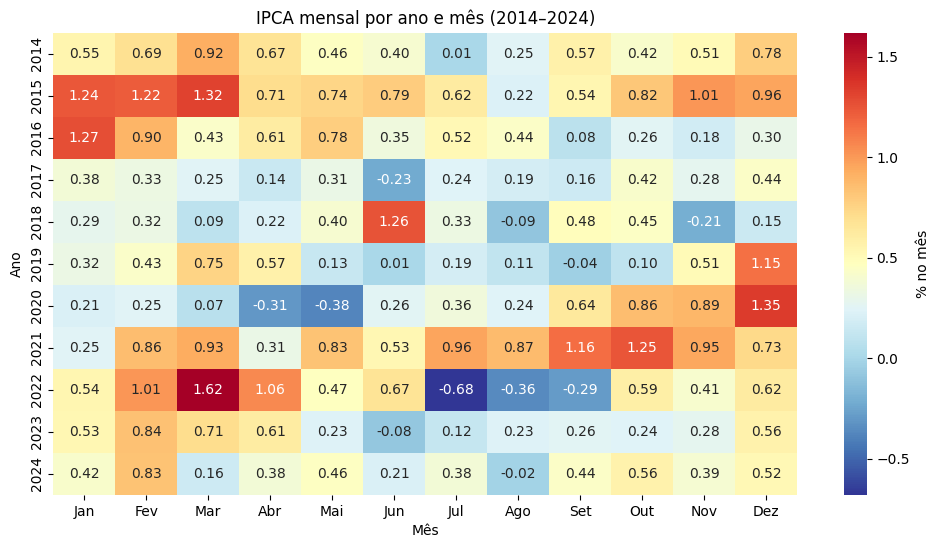

In [ ]:
import seaborn as sns

# Criar colunas de ano e mês
df['Ano'] = df['data'].dt.year
df['Mes'] = df['data'].dt.month

# Pivotar tabela: linhas = Ano, colunas = Mes, valores = IPCA
pivot = df.pivot_table(index='Ano', columns='Mes', values='valor', aggfunc='mean')

# Plotar heatmap
plt.figure(figsize=(12,6))
sns.heatmap(pivot, cmap="RdYlBu_r", annot=True, fmt=".2f", cbar_kws={'label': '% no mês'})
plt.title("IPCA mensal por ano e mês (2014–2024)")
plt.xlabel("Mês")
plt.ylabel("Ano")
plt.xticks(ticks=[i+0.5 for i in range(12)], labels=['Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez'], rotation=0)
plt.show()
